In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn import linear_model
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import warnings
warnings.filterwarnings("ignore")

# Scaleing Dataframe

In [3]:
df = pd.read_csv('dummy_df.csv')

In [4]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df)
scaler_df = pd.DataFrame(scaler_data, columns = df.columns.to_list())

In [5]:
scaler_df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,government_id,facebook,zhima_selfie,sent_id,reviews,sesame,email,weibo,google,manual_online
count,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,...,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04,2.762700e+04
mean,4.898329e-15,-4.665541e-15,-8.466597e-15,-9.750635e-15,-9.750635e-15,-8.466259e-15,-1.006418e-14,3.057521e-14,1.195531e-14,-5.531223e-16,...,6.790175e-15,1.059826e-14,3.078691e-15,-3.647802e-15,7.911301e-14,1.188699e-15,1.104044e-14,2.315825e-15,-1.156038e-14,-2.717728e-15
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-4.746093e+00,-3.578366e+00,-5.358469e-01,-1.143884e-01,-1.143884e-01,-1.540012e+01,-2.198220e+00,-3.877852e+00,-5.744422e+00,-1.552463e+00,...,-1.310772e+00,-4.757526e-01,-1.995795e-02,-3.902008e-02,-1.405733e+00,-2.481368e-02,-3.763377e+00,-2.623369e-02,-2.127202e-01,-7.891861e-02
25%,3.367299e-01,9.581876e-02,-5.358469e-01,-1.053355e-01,-1.053355e-01,6.493455e-02,4.549135e-01,-7.137920e-01,-6.718122e-01,-4.676454e-01,...,-1.310772e+00,-4.757526e-01,-1.995795e-02,-3.902008e-02,-1.405733e+00,-2.481368e-02,2.657188e-01,-2.623369e-02,-2.127202e-01,-7.891861e-02
50%,3.367299e-01,3.119473e-01,-5.358469e-01,-1.053355e-01,-1.053355e-01,6.493455e-02,4.549135e-01,-8.904121e-02,-1.135017e-01,-4.676454e-01,...,7.629093e-01,-4.757526e-01,-1.995795e-02,-3.902008e-02,7.113726e-01,-2.481368e-02,2.657188e-01,-2.623369e-02,-2.127202e-01,-7.891861e-02
75%,3.367299e-01,5.280757e-01,-5.358469e-01,-8.722972e-02,-8.722972e-02,6.493455e-02,4.549135e-01,6.120798e-01,3.522142e-01,6.171725e-01,...,7.629093e-01,-4.757526e-01,-1.995795e-02,-3.902008e-02,7.113726e-01,-2.481368e-02,2.657188e-01,-2.623369e-02,-2.127202e-01,-7.891861e-02
max,3.367299e-01,7.442042e-01,1.866205e+00,4.577467e+01,4.577467e+01,6.493455e-02,4.549135e-01,3.288787e+00,4.761573e+00,7.126080e+00,...,7.629093e-01,2.101933e+00,5.010534e+01,2.562783e+01,7.113726e-01,4.030034e+01,2.657188e-01,3.811893e+01,4.701010e+00,1.267128e+01


In [6]:
from sklearn.decomposition import PCA
X = scaler_df.drop(['price'],axis=1, inplace=False)
y = scaler_df['price']
pca = PCA(n_components = 10,svd_solver = 'randomized')
X_transform = pca.fit_transform(X)

In [7]:
X_transform

array([[ 2.02828904e+00,  2.93545603e+00,  1.20383420e+00, ...,
        -5.16323990e-03,  1.75654075e-01, -1.65732897e+00],
       [ 8.54834799e-01, -3.66772207e+00,  1.69904825e+00, ...,
        -7.60049560e-01,  2.70724182e-01, -4.67690817e-01],
       [-1.05741405e+00, -5.72322892e-01, -2.49993202e+00, ...,
        -8.46992359e-02, -9.32564176e-01, -1.82614412e+00],
       ...,
       [-3.29359673e+00,  1.57834989e+00,  8.08668584e-01, ...,
        -2.02213191e+00,  3.38839293e+00,  1.09029340e+00],
       [ 8.71280814e-02, -2.66591935e+00,  5.62879906e+00, ...,
         1.12677096e+01, -1.15688007e+00,  1.92471085e+00],
       [-3.75377076e+00, -1.41570323e-01, -2.56859487e+00, ...,
        -4.68409654e-01,  1.42119129e+00, -3.12835490e-01]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.33, random_state=42)

# Linear Regression

In [9]:
from sklearn.metrics import mean_squared_error
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
mse_lr = mean_squared_error(lr.predict(X_test), y_test)
r2_lr = r2_score(lr.predict(X_test), y_test)
print("MSE score of Linear Regression Model:",mse_lr)
print(r2_lr)

MSE score of Linear Regression Model: 0.5632956782136991
-5.1008077481227465


# LASSO

In [10]:
lasso_cv = linear_model.LassoCV(selection='random', cv=5)
lasso_cv.fit(X_train, y_train)
mse_lasso = mean_squared_error(lasso_cv.predict(X_test), y_test)
r2_lasso = r2_score(lasso_cv.predict(X_test), y_test)
print(mse_lasso)
print(r2_lasso)

0.5632419362889657
-5.178381634165357


# XGBoost

In [39]:
xgboost_params = {
    'n_estimators': hp.quniform('n_estimators', 800, 2400, 400),
    'max_depth':hp.quniform('max_depth', 5, 12, 1),
    'colsample_bytree':hp.quniform('colsample_bytree', 0.3, 1, 0.05),
    'min_child_weight':hp.quniform('min_child_weight', 1,6,1),
}

def hyperparameter_tuning_xgboost(space):
    clf = XGBRegressor(n_estimators=int(space['n_estimators']),
                       max_depth=int(space['max_depth']), min_child_weight=space['min_child_weight'],
                       colsample_bytree=space['colsample_bytree'], learning_rate=0.01,
                       seed=42)

    evaluation = [(X_test, y_test)]
    clf.fit(X_train, y_train,
            eval_set=evaluation,
            early_stopping_rounds=200, verbose=False)
    y_pred = clf.predict(X_test)
    rmse = np.sqrt(((y_test-y_pred)**2).mean())
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()
xgboost_best = fmin(fn=hyperparameter_tuning_xgboost, space=xgboost_params, algo=tpe.suggest,
                    max_evals=200, trials=trials)

xgb = XGBRegressor(n_estimators=int(xgboost_best['n_estimators']),
                   max_depth=int(xgboost_best['max_depth']), min_child_weight=xgboost_best['min_child_weight'],
                   colsample_bytree=xgboost_best['colsample_bytree'], learning_rate=0.01,
                   seed=42)
evaluation = [(X_test, y_test)]
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

test_score_xg = xgb.score(X_test, y_test)
train_score_xg = xgb.score(X_train, y_train)

100%|██████████| 200/200 [1:11:00<00:00, 21.30s/trial, best loss: 0.7213304892602292]


In [40]:
test_score_xg

0.18811272232242604

In [41]:
train_score_xg

0.9858862395949155

In [42]:
xgboost_best

{'colsample_bytree': 0.4,
 'max_depth': 10.0,
 'min_child_weight': 1.0,
 'n_estimators': 1600.0}

In [45]:
xgb.feature_importances_

array([0.07700451, 0.08915168, 0.1472657 , 0.07689214, 0.09882391,
       0.13457672, 0.08443933, 0.08405108, 0.08890659, 0.1188884 ],
      dtype=float32)

Text(0.5, 0, 'Relative Importanceog XGBoost')

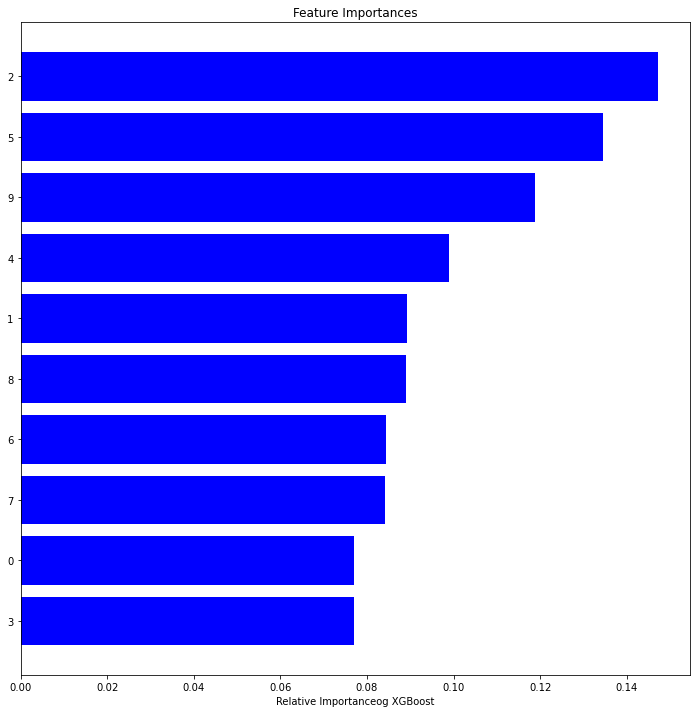

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = xgb.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array([0,1,2,3,4,5,6,7,8,9])[indices])
plt.xlabel('Relative Importanceog XGBoost')

# CatBoost (GridSearch)

In [24]:
params = {
    'n_estimators': [100,300,500,800],
    'learning_rate':[0.01],
    'max_depth':np.arange(5, 12),
    'colsample_bylevel':np.arange(0.1, 0.8, 0.05),
    'min_child_samples':np.arange(50, 200, 50),
}

CVmodel = GridSearchCV(CatBoostRegressor(logging_level='Silent'),params,cv=3)
CVmodel.fit(X_train, np.ravel(y_train))

cb_model = CatBoostRegressor(n_estimators = CVmodel.best_params_['n_estimators'],
                             learning_rate=CVmodel.best_params_['learning_rate'],
                             max_depth=CVmodel.best_params_['max_depth'],
                             min_child_samples=CVmodel.best_params_['min_child_samples'],
                             colsample_bylevel=CVmodel.best_params_['colsample_bylevel'],
                             random_seed=42, logging_level='Silent')

cb_model.fit(X_train,y_train)
cb_train_pred = cb_model.predict(X_train)
cb_test_pred = cb_model.predict(X_test)

train_score_grid = r2_score(y_train, cb_train_pred)
test_score_grid = r2_score(y_test, cb_test_pred)

In [26]:
train_score_grid

0.6170352396887195

In [27]:
test_score_grid

0.2206603916741896

In [28]:
CVmodel.best_params_

{'colsample_bylevel': 0.40000000000000013,
 'learning_rate': 0.01,
 'max_depth': 11,
 'min_child_samples': 50,
 'n_estimators': 800}

Text(0.5, 0, 'Relative Importanceog CatBoost (GridSearch) with PCA')

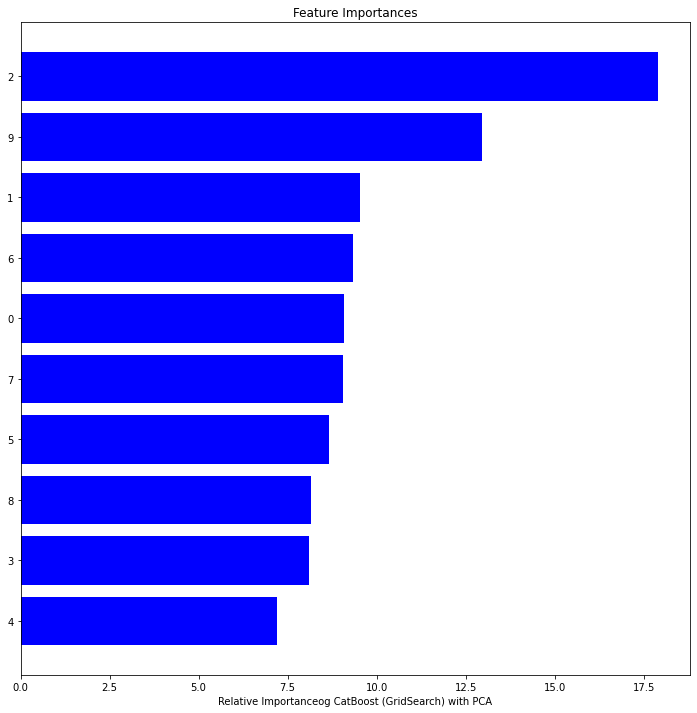

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = cb_model.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array([0,1,2,3,4,5,6,7,8,9])[indices])
plt.xlabel('Relative Importanceog CatBoost (GridSearch) with PCA')

# CatBoost (fmin)

In [12]:
catboost_params = {
    'n_estimators':hp.quniform('n_estimators', 100, 800, 100),
    'max_depth':hp.quniform('max_depth', 5, 12, 1),
    'colsample_bylevel':hp.quniform('colsample_bylevel', 0.1, 0.8, 0.05),
    'min_child_samples':hp.quniform('min_child_samples', 50, 200, 50),
}

def hyperparameter_tuning_catboost(space):
    clf=CatBoostRegressor(n_estimators=int(space['n_estimators']),
                          max_depth=int(space['max_depth']), min_child_samples=space['min_child_samples'],
                          colsample_bylevel=space['colsample_bylevel'], learning_rate=0.01,
                          random_seed=42, logging_level='Silent')

    evaluation = [(X_test, y_test)]
    clf.fit(X_train, y_train,
            eval_set=evaluation,
            early_stopping_rounds=200, verbose=False)
    y_pred = clf.predict(X_test)
    rmse = np.sqrt(((y_test-y_pred)**2).mean())
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()
catboost_best = fmin(fn=hyperparameter_tuning_catboost, space=catboost_params, algo=tpe.suggest,
                     max_evals=100, trials=trials)

cb = CatBoostRegressor(n_estimators=int(catboost_best['n_estimators']),
                       max_depth=int(catboost_best['max_depth']), min_child_samples=catboost_best['min_child_samples'],
                       colsample_bylevel=catboost_best['colsample_bylevel'], learning_rate=0.01,
                       random_seed=42, logging_level='Silent')
evaluation = [(X_test, y_test)]
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

test_score = cb.score(X_test, y_test)
train_score = cb.score(X_train, y_train)

100%|██████████████████████████████████████████████| 100/100 [20:35<00:00, 12.35s/trial, best loss: 0.7043719587147637]


In [13]:
test_score

0.22585934797936558

In [14]:
train_score

0.6813112090871911

In [15]:
cb.best_score_

{'learn': {'RMSE': 0.6124013990237241}}

In [16]:
catboost_best

{'colsample_bylevel': 0.7000000000000001,
 'max_depth': 12.0,
 'min_child_samples': 100.0,
 'n_estimators': 800.0}

Text(0.5, 0, 'Relative Importanceog CatBoost (fmin) with PCA')

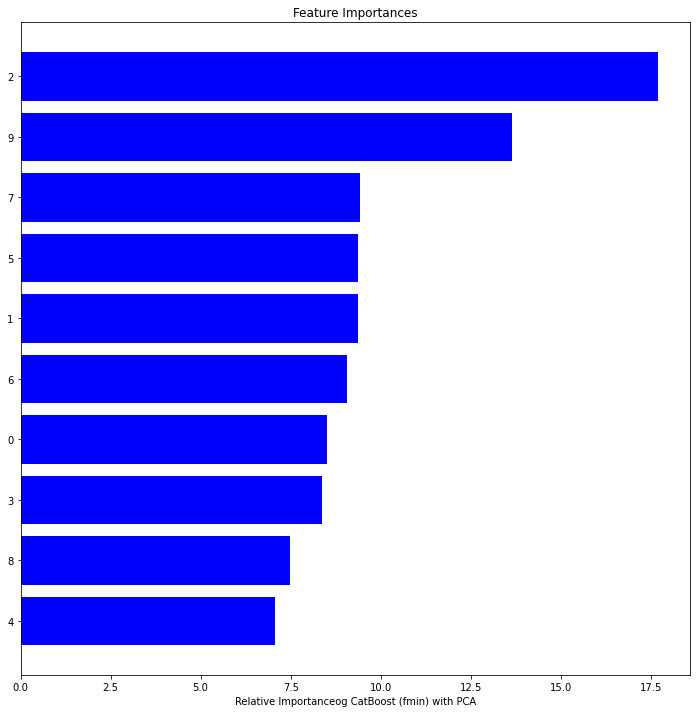

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = cb.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array([0,1,2,3,4,5,6,7,8,9])[indices])
plt.xlabel('Relative Importanceog CatBoost (fmin) with PCA')